# **Tweet Sınıflandırma**

https://www.kaggle.com/datasets/datatattle/covid-19-nlp-text-classification

## Data & Import

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
train_df = pd.read_csv("Corona_NLP_train.csv", encoding= 'ISO-8859-1')
test_df = pd.read_csv("Corona_NLP_test.csv", encoding= 'ISO-8859-1')

---
## EDA

In [72]:
train_df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [74]:
train_df["Location"].nunique()

12220

In [75]:
train_df = train_df[["OriginalTweet", "Sentiment"]]
test_df = test_df[["OriginalTweet", "Sentiment"]]

In [76]:
train_df

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...
41152,Airline pilots offering to stock supermarket s...,Neutral
41153,Response to complaint not provided citing COVI...,Extremely Negative
41154,You know itÂs getting tough when @KameronWild...,Positive
41155,Is it wrong that the smell of hand sanitizer i...,Neutral


In [77]:
train_df["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

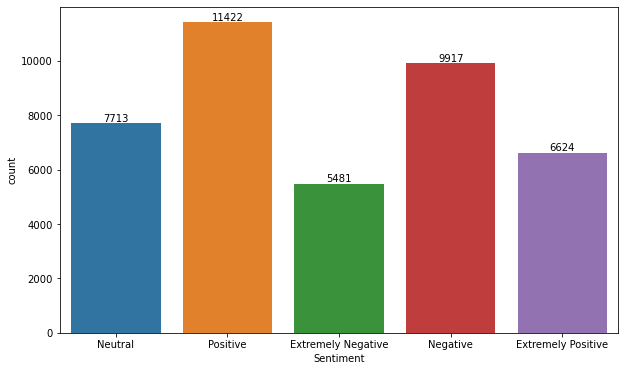

In [78]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Sentiment", data=train_df)
ax.bar_label(ax.containers[0]);

In [79]:
test_df["Sentiment"].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [69]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="Sentiment", data=test_df)
ax.bar_label(ax.containers[0]);

Error in callback <function flush_figures at 0x00000269EEC7F0D0> (for post_execute):


KeyboardInterrupt: 

---
## Train Test Split

In [80]:
X_train = train_df["OriginalTweet"]
X_test = test_df["OriginalTweet"]
y_train = train_df["Sentiment"]
y_test = test_df["Sentiment"]

In [81]:
print(X_train[:2],"\n")
print(y_train[:2],"\n")
print(X_test[:2],"\n")
print(y_test[:2])

0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
Name: OriginalTweet, dtype: object 

0     Neutral
1    Positive
Name: Sentiment, dtype: object 

0    TRENDING: New Yorkers encounter empty supermar...
1    When I couldn't find hand sanitizer at Fred Me...
Name: OriginalTweet, dtype: object 

0    Extremely Negative
1              Positive
Name: Sentiment, dtype: object


---
## Vectorization

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [83]:
tfidf = TfidfVectorizer(stop_words="english")

In [84]:
X_tfidf_train = tfidf.fit_transform(X_train)
X_tfidf_test = tfidf.transform(X_test)

In [85]:
X_tfidf_train

<41157x80120 sparse matrix of type '<class 'numpy.float64'>'
	with 728554 stored elements in Compressed Sparse Row format>

**Bu boyutta bir matriste .todense() fonksiyonunu kullanırsanız bilgisayarınızın ayranı dökülebilir.**

---
## Tweet Görselleştirme

In [86]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [87]:
stopwords = set(STOPWORDS)

In [88]:
wc = WordCloud(
    background_color= 'white',
    stopwords= stopwords,
    max_words= 800,
).generate(str(X_train))

(-0.5, 399.5, 199.5, -0.5)

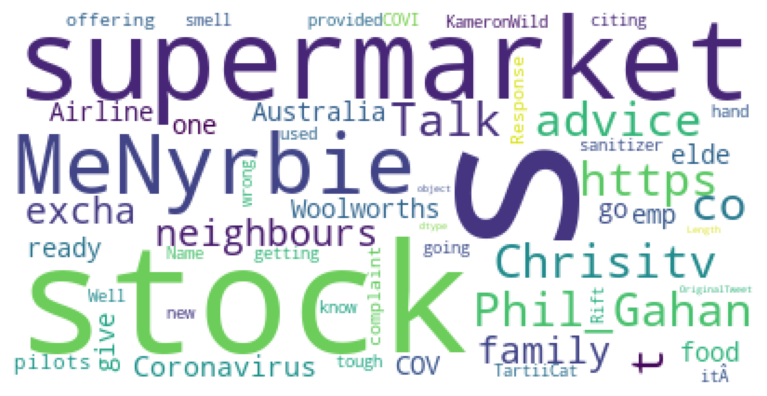

In [89]:
plt.figure(figsize=(8,8), dpi=120)
plt.imshow(wc)
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

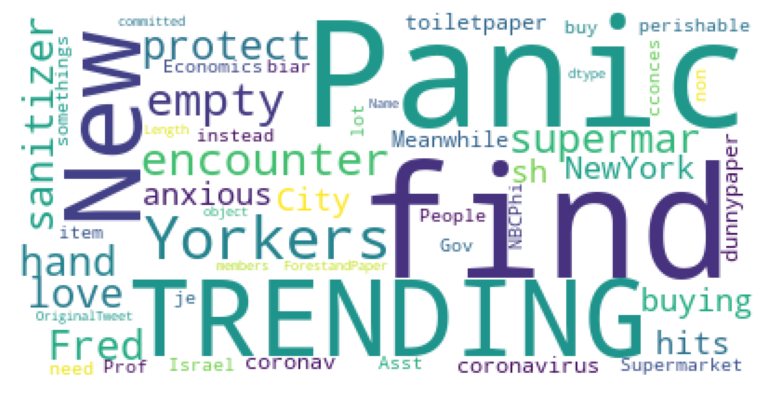

In [90]:
wc = WordCloud(
    background_color= 'white',
    stopwords= stopwords,
    max_words= 800,
).generate(str(X_test))

plt.figure(figsize=(8,8), dpi=120)
plt.imshow(wc)
plt.axis("off")

---
## Naive Bayes Model

In [91]:
from sklearn.naive_bayes import MultinomialNB

In [92]:
naive_bayes = MultinomialNB()

In [93]:
naive_bayes.fit(X_tfidf_train,y_train)

MultinomialNB()

In [94]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

In [95]:
def sonuc(model):
    tweet_pred = model.predict(X_tfidf_test)
    print(classification_report(y_test,tweet_pred))
    cm = confusion_matrix(y_test,tweet_pred)
    cmp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                 display_labels=model.classes_)
    fig, ax = plt.subplots(figsize=(11,11))
    cmp.plot(ax=ax)
# Burada confusion matrix display kodunu farklı yazdık
# Siz hangi şekilde yazmak isterseniz öyle yazın
# Ben elim alıştığı için genel olarak .from_estimator() kullanıyorum.
# Ama burada şekli büyütmek için o şekilde yazmadım.

                    precision    recall  f1-score   support

Extremely Negative       0.80      0.01      0.01       592
Extremely Positive       1.00      0.02      0.04       599
          Negative       0.39      0.38      0.39      1041
           Neutral       0.86      0.03      0.06       619
          Positive       0.31      0.90      0.46       947

          accuracy                           0.34      3798
         macro avg       0.67      0.27      0.19      3798
      weighted avg       0.61      0.34      0.24      3798



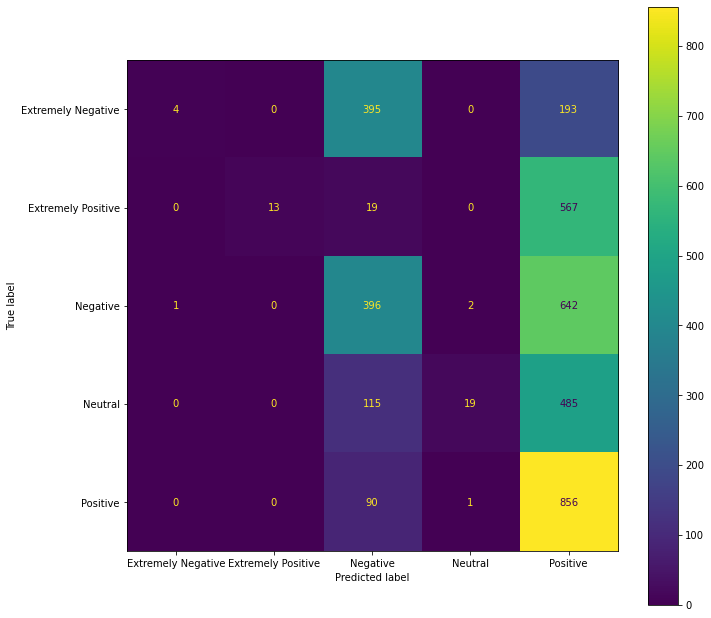

In [96]:
sonuc(naive_bayes)

---
## Support Vector Machine

In [97]:
from sklearn.svm import LinearSVC

In [98]:
svc = LinearSVC()

In [99]:
svc.fit(X_tfidf_train,y_train)

LinearSVC()

                    precision    recall  f1-score   support

Extremely Negative       0.58      0.59      0.59       592
Extremely Positive       0.60      0.61      0.61       599
          Negative       0.49      0.44      0.46      1041
           Neutral       0.60      0.59      0.59       619
          Positive       0.47      0.51      0.49       947

          accuracy                           0.53      3798
         macro avg       0.55      0.55      0.55      3798
      weighted avg       0.53      0.53      0.53      3798



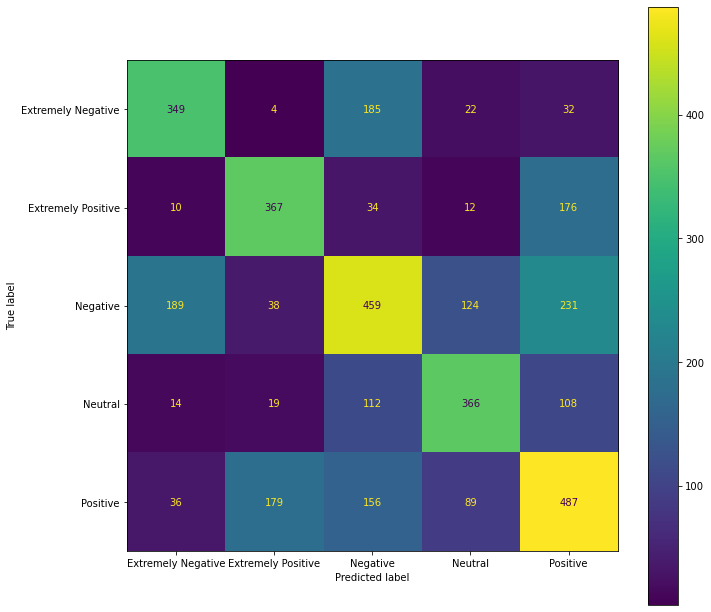

In [100]:
sonuc(svc)

---
## Lojistik Regresyon Modeli

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
log_regr = LogisticRegression()

In [103]:
log_regr.fit(X_tfidf_train,y_train)

c:\Users\mbatu\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

                    precision    recall  f1-score   support

Extremely Negative       0.61      0.47      0.53       592
Extremely Positive       0.69      0.51      0.58       599
          Negative       0.50      0.49      0.49      1041
           Neutral       0.61      0.65      0.63       619
          Positive       0.48      0.61      0.54       947

          accuracy                           0.55      3798
         macro avg       0.58      0.55      0.55      3798
      weighted avg       0.56      0.55      0.55      3798



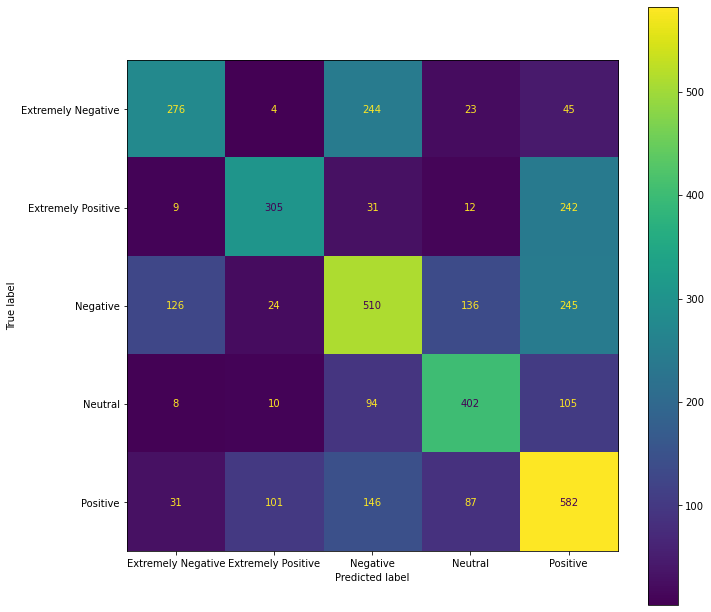

In [104]:
sonuc(log_regr)

# **https://www.youtube.com/watch?v=uMTpV_jB9is**